# BAYESIAN LOGISTIC REGRESSION : 




<h3> part one : Provide a Gaussian approximation for the posterior.
</h3>

in the first part of the problem we are asked to give a gaussian approximation to the posterior, we must note that the posterior obtained via the <b>laplace approximation</b> route is the gaussian approximation to the logistic regression problem :

$$p(\theta|D) = \frac{p(D,\theta)}{p(D)} = \frac{p(D,\theta)}{\int p(D,\theta) d\theta } = \frac{e^{ln(p(D,\theta))}}{\int e^{ln(p(D,\theta))} d\theta }$$

suppose that $ln(p(D, \theta) ) = f(\theta) $. approximate this function of theta using its 2nd order Taylor expansion : 

$$f(\theta) \approx  f(\theta_o) + (\theta - \theta_o)^T \nabla f(\theta_o) + \frac{1}{2} (\theta - \theta_o)^T \nabla^2 f(\theta_o)(\theta - \theta_o)$$

now we will take $\theta_o = \theta_{MAP}$ as the gradient term or the first order term is 0 at that point. which will lead to the following form : 

$$f(\theta) \approx  ln(p(D, \theta_{MAP}))  + \frac{1}{2} (\theta - \theta_{MAP})^T \nabla^2 ln(p(D, \theta_{MAP})) (\theta - \theta_{MAP})$$

$$p(\theta|D) = \frac{e^{ln(p(D,\theta))}}{\int e^{ln(p(D,\theta))} d\theta } \approx  \frac{e^{ln(p(D, \theta_{MAP}))  + \frac{1}{2} (\theta - \theta_{MAP})^T \nabla^2 ln(p(D, \theta_{MAP})) (\theta - \theta_{MAP})}}{\int e^{ln(p(D, \theta_{MAP}))  + \frac{1}{2} (\theta - \theta_{MAP})^T \nabla^2 ln(p(D, \theta_{MAP})) (\theta - \theta_{MAP})} d\theta } $$

therefore the Laplace Approximation of the posterior is a Gaussian and is given by : 

$$p(\theta |D) \approx  N(\theta | \theta_{MAP}, H^{-1}) $$

<h3>part two : Provide an approximation for the posterior predictive using Monte Carlo approximation as well as probit approximation.</h3>

the posterior predictive is given by the following integral : 

$$p(\tilde y  = 1 | \tilde x, X, y)  \approx  \int \sigma(w^T \tilde x) N(w|w_{MAP}, H^{-1})dw$$

in the above integral we have to use the monte-carlo approximation according to which we have to draw several samples of w from the posterior and then replace the integral by the empirical average of $\sigma(w^T \tilde x)  $ computed using each of those samples. this can be written mathematically as : 


$$p(\tilde y = 1 | \tilde x, X, y )  \approx \frac{1}{S} \sum_{s=1}^{S} \sigma({w_s}^T \tilde x)$$

where $w_s \sim N(w |w_{MAP}, H^{-1}), s = 1, ..., S $

the above section explains the monte-carlo approximation to the posterior predictiove distribution, now let us discuss the probit approximation for the same : 

$$p(\tilde y  = 1 | \tilde x, X, y)  \approx  \int \sigma(w^T \tilde x) N(w|w_{MAP}, H^{-1})dw$$

in the above integral we will replace the sigmoid function by the CDF of the standard normal (probit), i.e. - $\Phi(z) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{z} exp(-t^2) dt $ : 

$$p(\tilde y  = 1 | \tilde x, X, y)  \approx  \int \sigma(w^T \tilde x) N(w|w_{MAP}, H^{-1})dw = \int_{-\infty}^{\infty} \Phi(a) p(a|\mu_a, \sigma^2_a) da$$ 

where $a = w^T \tilde x = \tilde x^T w $ and the $w$ is normally distributed with $\mu_a = w_{MAP}^T \tilde x $ and $\sigma^2_a = \tilde x^T H^{-1} \tilde x$

using this we can say that the predictive distribution can be approximated as : 

$$p(\tilde y  = 1 | \tilde x, X, y)  \approx \Phi \left(\frac{\mu_a}{\sqrt{1+ \sigma_a^2}} \right)$$

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import pymatreader as pmtr
import matplotlib.pyplot as plt 

from scipy.stats import norm, multivariate_normal

import bayes_logistic
import warnings

warnings.filterwarnings("ignore", category=RuntimeWarning)

%matplotlib inline

In [2]:
sns.set_style('whitegrid')

In [3]:
sns.set_color_codes('bright')

In [4]:
data = pmtr.read_mat('P6.mat')

In [5]:
X, alpha, t = data['X'], data['alpha'], data['t']

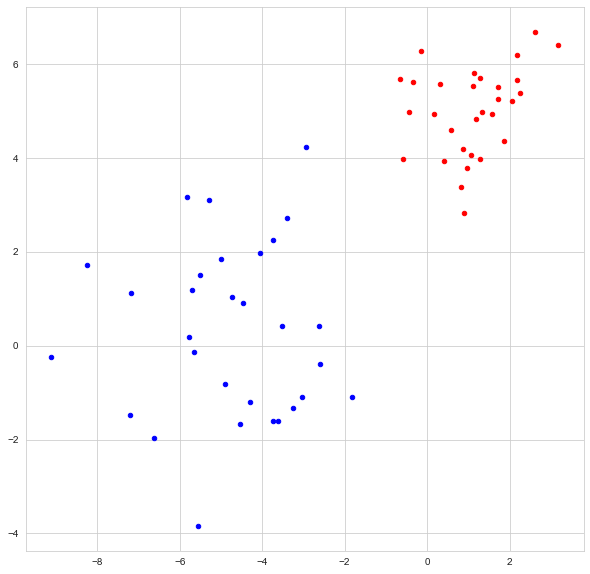

In [6]:
plt.figure(figsize=(10,10))
x_1, y_1 = X[np.where(t==1)[0]].T
x_2, y_2 = X[np.where(t==0)[0]].T
plt.scatter(x_1,y_1,c = 'red', s=20, marker = 'o')
plt.scatter(x_2,y_2,c = 'blue', s = 20, marker = 'o')

plt.savefig("plot_1.png", dpi = 300)

we can clearly see two linearly seperable clusters in the scatter plot !

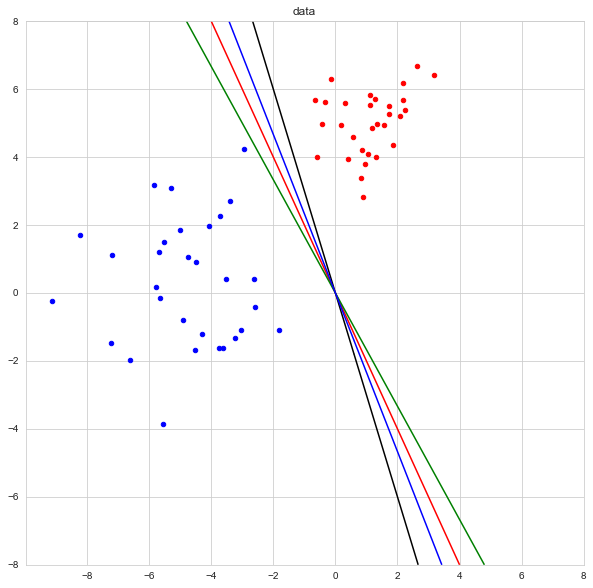

In [7]:
plt.figure(figsize=(10,10))
x_1, y_1 = X[np.where(t==1)[0]].T
x_2, y_2 = X[np.where(t==0)[0]].T
plt.scatter(x_1,y_1,c = 'red', s=20, marker = 'o')
plt.scatter(x_2,y_2,c = 'blue', s = 20, marker = 'o')


alpha = 100 


Xgrid = data['Xgrid']

ws = np.array([[3, 1], [4, 2], [5, 3], [7, 3]])
col = ['black', 'red', 'green', 'blue']

for ii in range(ws.shape[0]):
    w = ws[ii][:]
    pred = 1.0/(1+np.exp(np.dot(-Xgrid,w)))
    plt.contour(Xgrid[:, 0].reshape((161, 161)), Xgrid[:,1].reshape((161, 161)), pred.reshape((161, 161)), 1, colors=col[ii])

plt.title("data")
plt.savefig("plot_2.png", dpi = 300)

In [8]:
Xt = np.transpose(X)

W = np.hstack((Xgrid[:,0].reshape((161*161, 1)),Xgrid[:,1].reshape((161*161, 1))))

f=np.dot(W,Xt)

log_prior = np.log(multivariate_normal.pdf(W, cov=(np.identity(2))*alpha))

log_like = np.dot(np.dot(W, Xt), t).reshape((161*161,1)) - np.sum(np.log(1+np.exp(f)), 1).reshape((161*161,1))
log_joint = log_like.reshape((161*161,1)) + log_prior.reshape((161*161,1))

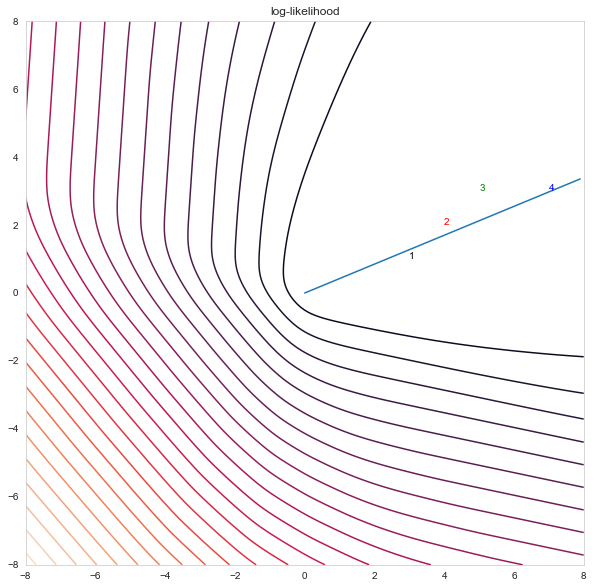

In [9]:
xx = Xgrid[:,0].reshape((161,161))
yy = Xgrid[:,1].reshape((161,161))

n = 161

plt.figure(figsize=(10,10))
plt.contour(xx, yy, (-1*log_like).reshape(161,161), 30)
plt.title("log-likelihood")


for ii in range(0, ws.shape[0]):
    w = np.transpose(ws[ii, :])
    plt.annotate(str(ii+1), xy=(w[0], w[1]), color=col[ii])

j=np.argmax(log_like)
wmle = W[j, :]
slope = wmle[1] / wmle[0]

#plt.axline([wmle[0], wmle[1]], slope=slope)

plt.plot([0, 7.9], [0, 7.9*slope])
plt.grid()

plt.savefig("plot_3(log-likelihood).png", dpi = 300)



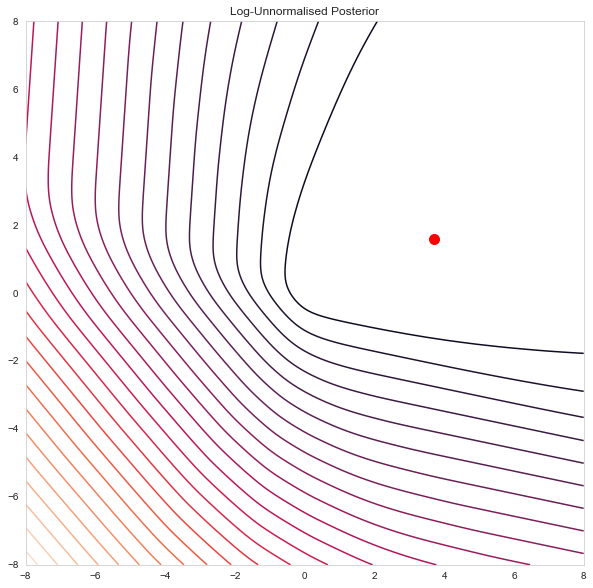

In [10]:
plt.figure(figsize=(10,10))
plt.contour(xx,yy,-1*log_joint.reshape((n,n)), 30)
plt.title("Log-Unnormalised Posterior")
j2=np.argmax(log_joint)
wb = W[j2][:]
plt.scatter(wb[0], wb[1], c='red' , s = 100)
plt.grid()
plt.savefig("plot_4(un-normalised prior).png", dpi = 300)

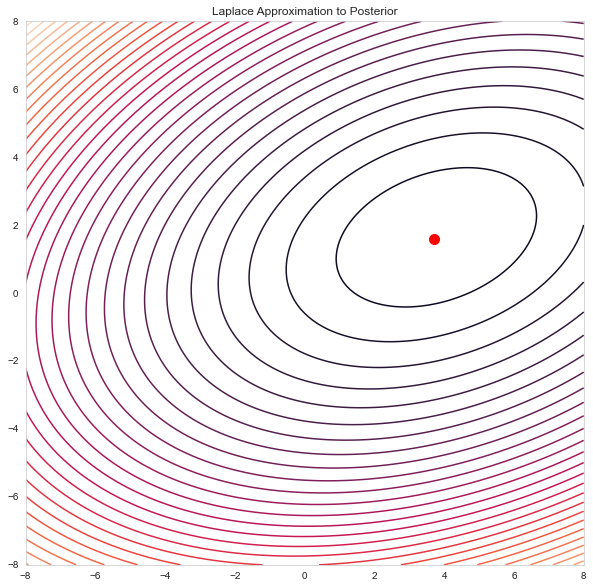

In [11]:
plt.figure(figsize=(10,10))

wfit, hfit = bayes_logistic.fit_bayes_logistic(t.reshape((30*2)), X, np.zeros(2), ((np.identity(2))*1/alpha), weights=None, solver='Newton-CG', bounds=None, maxiter=100)
co = np.linalg.inv(hfit)
    
log_laplace_posterior = np.log(multivariate_normal.pdf(W, mean = wfit, cov=co))
plt.contour(xx, yy, -1*log_laplace_posterior.reshape((n,n)), 30)
plt.scatter(wb[0], wb[1], c='red' , s = 100)

plt.title("Laplace Approximation to Posterior")
plt.grid()

plt.savefig("plot_5(laplace-approximation).png", dpi = 300)



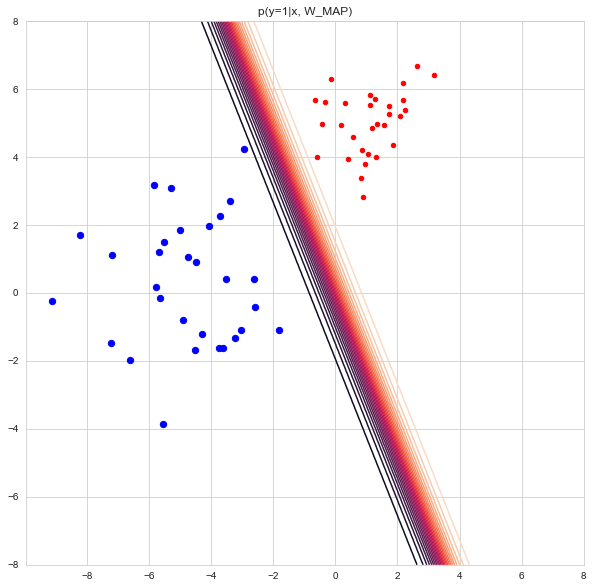

In [12]:
plt.figure(figsize=(10,10))

pred = 1.0/(1+np.exp(np.dot(-Xgrid,wfit)))
plt.contour(xx, yy, pred.reshape((n,n)), 30)
x_1, y_1 = X[np.where(t == 1)[0]].T
x_2, y_2 = X[np.where(t == 0)[0]].T

plt.scatter(x_1, y_1, c='red', s=20, marker='o')
plt.scatter(x_2, y_2, c = 'blue', s=40, marker = 'o')

plt.title("p(y=1|x, W_MAP)")

plt.savefig("plot_6(predictive - distribution for logit).png", dpi=300)

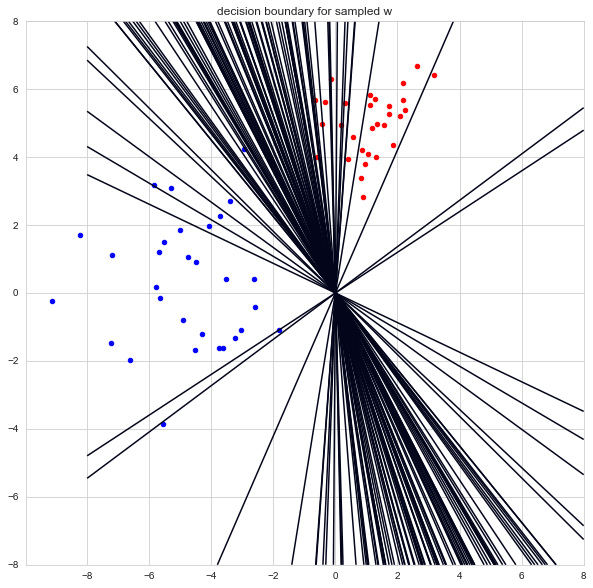

In [12]:
plt.figure(figsize=(10,10))


plt.scatter(x_1, y_1, c='red', s=20, marker='o')
plt.scatter(x_2, y_2, c='blue', s=20, marker='o')
predm = np.zeros((n*n,1))

s = 100
for i in range(s):
    wsamp = np.random.multivariate_normal(mean = wfit, cov=co)
    pred = 1.0/(1+np.exp(np.dot(-Xgrid,wsamp)))
    predm = np.add(predm, pred.reshape((n*n, 1)))
    plt.contour(xx, yy, pred.reshape((n,n)), np.array([0.5]))

plt.title("decision boundary for sampled w")
plt.savefig("plot_7(Decision boundary for sampled w).png", dpi=300)

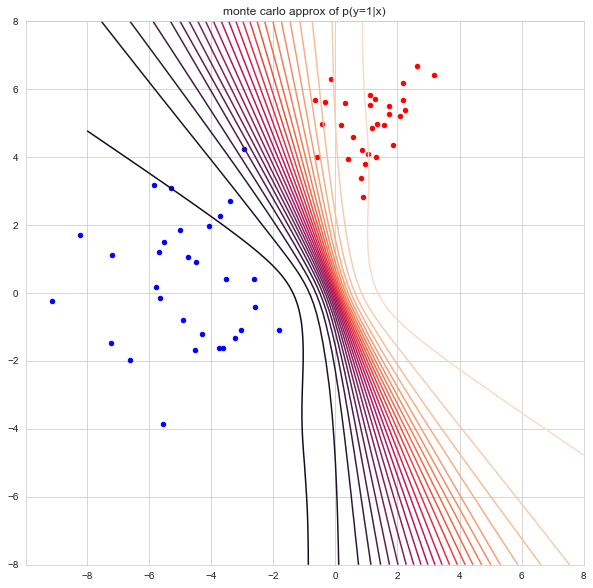

In [13]:
plt.figure(figsize=(10,10))

predm = predm/s
plt.contour(xx, yy, predm.reshape((n,n)), 30)
plt.scatter(x_1, y_1, c='red', s=20, marker='o')
plt.scatter(x_2, y_2, c='blue', s=20, marker='o')
plt.title("monte carlo approx of p(y=1|x)")
plt.savefig("plot_8(MONTECARLO_APPROXIMATION).png", dpi=300)

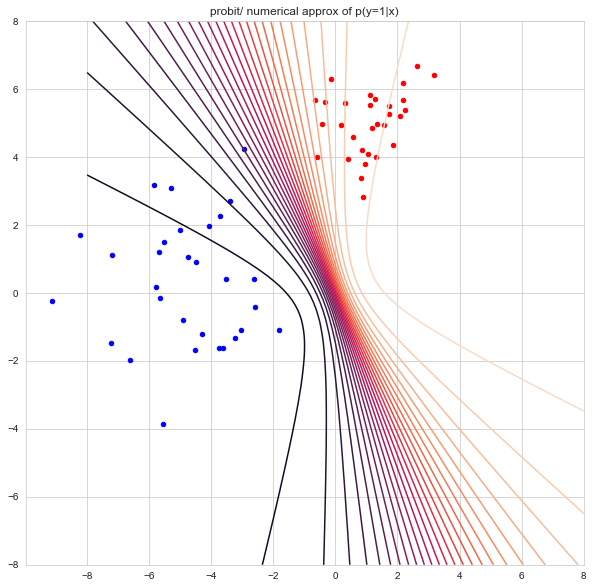

In [14]:
plt.figure(figsize=(10,10))

plt.scatter(x_1, y_1, c='red', s=20, marker='o')
plt.scatter(x_2, y_2, c='blue', s=20, marker='o')

pr = bayes_logistic.bayes_logistic_prob(Xgrid, wfit, hfit)

plt.contour(xx, yy, pr.reshape((n, n)), 30)
plt.title("probit/ numerical approx of p(y=1|x)")
plt.savefig("plot_9(probit or numerical approximation).png", dpi=300)